## The SparksFoundation- GRIP internship 

# Task 03 : #3 Exploratory Data Analysis Retail Superstore

*#Onkar Kota*

In [3]:
from os import path

In [5]:
fname = 'D:/Coding Files/Data Science/Creativity/SampleSuperstore.csv'

In [6]:
with open(fname) as fp:
    print(sum(1 for line in fp))

9995


In [151]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('grade3')

In [143]:
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
from pylab import rcParams

In [19]:
%matplotlib inline
rcParams['figure.figsize']=10,8

In [8]:
df = pd.read_csv(fname)

In [17]:
df.shape

(9994, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [19]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [21]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [27]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [28]:
df['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
52240      1
94509      1
53186      1
32503      1
60025      1
Name: Postal Code, Length: 631, dtype: int64

## Droping unwanted features

In [22]:
df.drop(['Country','Postal Code'], axis=1, inplace=True)

<AxesSubplot:xlabel='Segment', ylabel='count'>

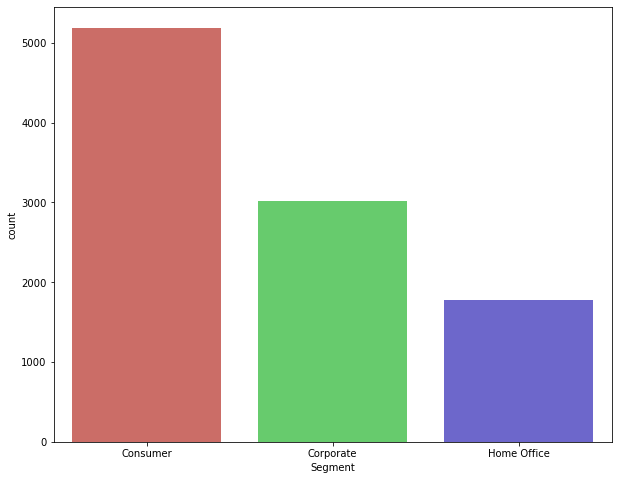

In [20]:
sb.countplot(x='Segment', data= df, palette='hls')

<AxesSubplot:>

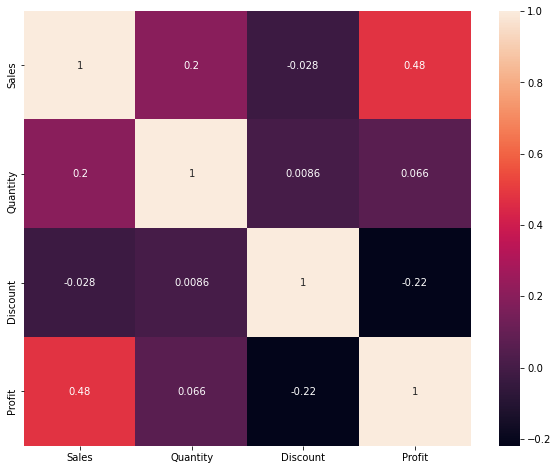

In [23]:
corr = df.corr()
sb.heatmap(corr, annot=True)

**From the above heatmap we can say that the darker the block the less the correlation between them.**
- Discount and profit,sales and discount has vey less correlation.

## 1. Profit vs Discount vs Sale

### a) Based on Category

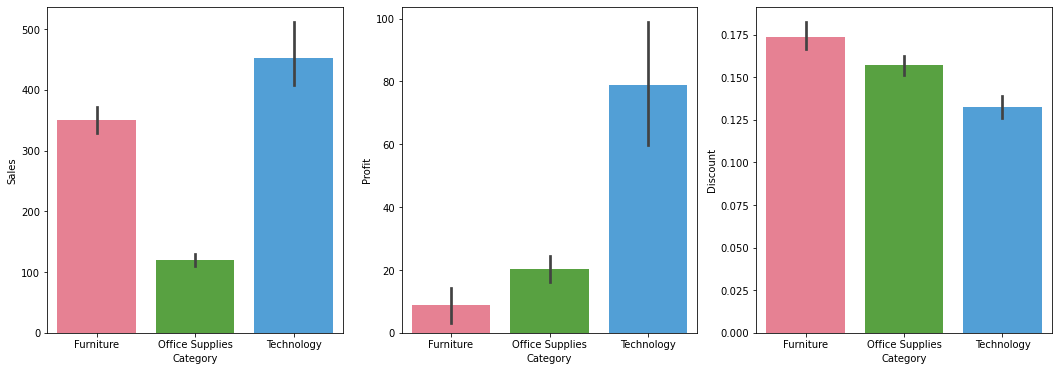

In [32]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sb.barplot(x='Category',y='Sales', data=df, ax=ax[0], palette="husl")
sb.barplot(x='Category',y='Profit', data=df, ax=ax[1],palette="husl")
sb.barplot(x='Category',y='Discount', data=df, ax=ax[2],palette="husl")
plt.show()

### b) Based on Region

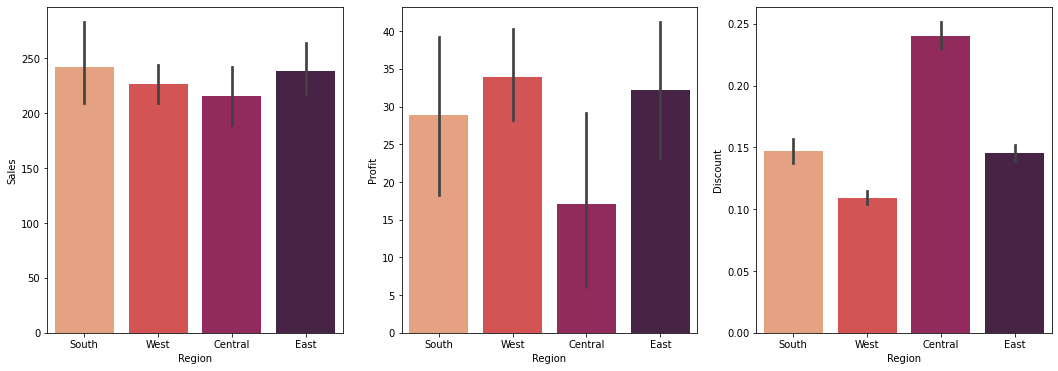

In [40]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sb.barplot(x='Region',y='Sales', data=df, ax=ax[0], palette="rocket_r")
sb.barplot(x='Region',y='Profit', data=df, ax=ax[1],palette="rocket_r")
sb.barplot(x='Region',y='Discount', data=df, ax=ax[2],palette="rocket_r")
plt.show()

### c) Based on Segment

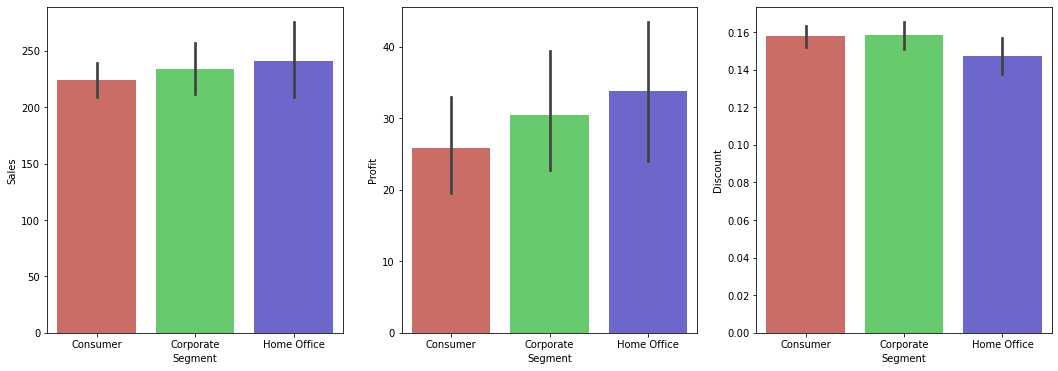

In [44]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sb.barplot(x='Segment', y='Sales', data=df, palette='hls', ax=ax[0])
sb.barplot(x='Segment', y='Profit', data=df, palette='hls', ax=ax[1])
sb.barplot(x='Segment', y='Discount', data=df, palette='hls', ax=ax[2])
plt.show()

### d) Based on Ship Mode

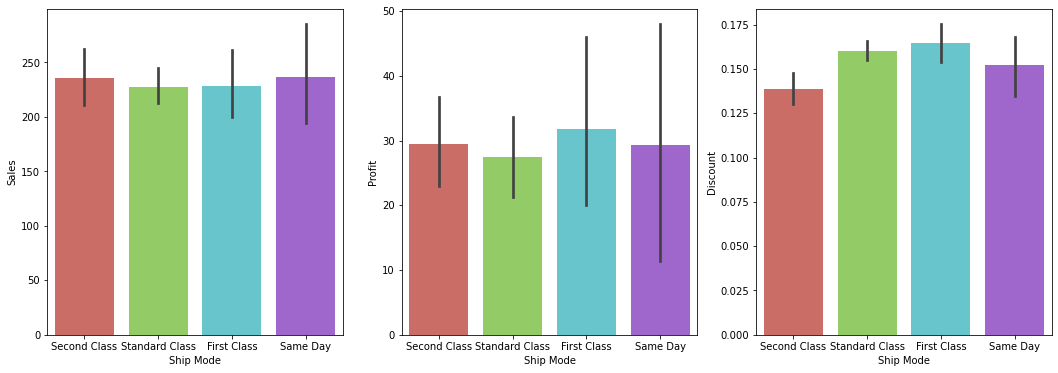

In [48]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sb.barplot(x='Ship Mode', y='Sales', data=df, palette='hls', ax=ax[0])
sb.barplot(x='Ship Mode', y='Profit', data=df, palette='hls', ax=ax[1])
sb.barplot(x='Ship Mode', y='Discount', data=df, palette='hls', ax=ax[2])
plt.show()

### e) Based on Quantity

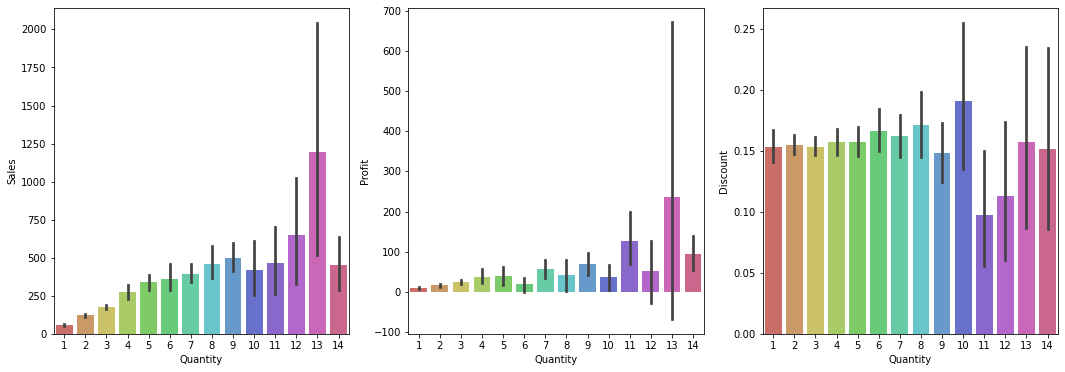

In [49]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
sb.barplot(x='Quantity', y='Sales', data=df, palette='hls', ax=ax[0])
sb.barplot(x='Quantity', y='Profit', data=df, palette='hls', ax=ax[1])
sb.barplot(x='Quantity', y='Discount', data=df, palette='hls', ax=ax[2])
plt.show()

## 2. Category level Analysis

In [58]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### a) Number of quantity in each Category

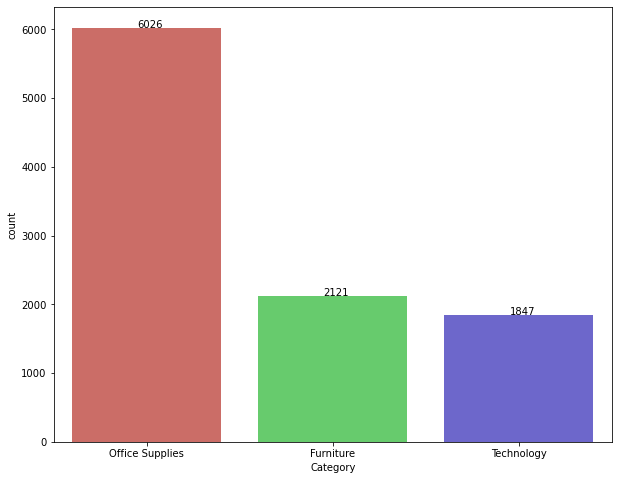

In [59]:
ax = sb.countplot(x='Category', data=df, palette='hls', order=df['Category'].value_counts().index)
for a in ax.patches:
    ax.annotate(format(a.get_height()), (a.get_x()+0.35, a.get_height()+1))
plt.show()    

### b) Number of Quantity in each Sub-Category

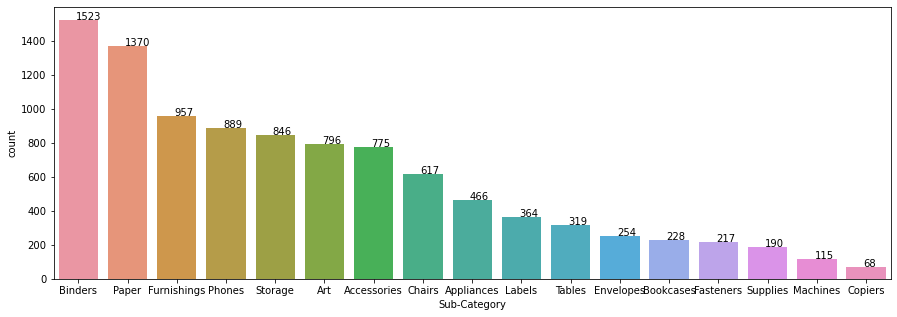

In [64]:
plt.figure(figsize=(15,5))
ax = sb.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index)
for a in ax.patches:
    ax.annotate(format(a.get_height()), (a.get_x()+0.35, a.get_height()+1))
plt.show()    

### c) Total Sub-Categories by Percentage

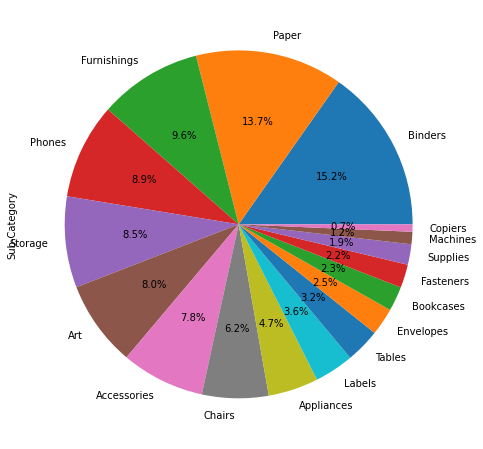

In [99]:
plt.figure(figsize=(8,8))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Category contibuted most to the Sales

In [105]:
def autopct_format(values): 
    def my_format(pct): 
        plt.rcParams["figure.figsize"] = (13,5) 
        plt.rcParams['font.size'] = 12.0 
        plt.rcParams['font.weight'] = 6
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

In [97]:
top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False) 
top_category = top_category[["Sales"]]
total_revenue_category = '$' + str(int(top_category["Sales"].sum()))
top_category.reset_index(inplace=True)

In [71]:
top_sal

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [73]:
top_qty

,Quantity
Category,
Technology,6939
Furniture,8028
Office Supplies,22906


In [79]:
import numpy as np

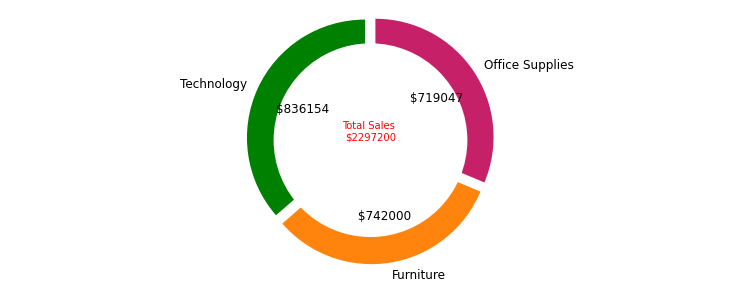

In [106]:
colors = ['green','#FE840E','#C62168']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(top_category['Sales'], colors = colors, labels=top_category['Category'], autopct= autopct_format(top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Sales \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()

### Sub-Category contributed most to the sales

In [118]:
Top_Sub_Category= df.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False) 
Top_Sub_Category= Top_Sub_Category[["Sales"]]
total_revenue_Sub_Category= '$' + str(int(Top_Sub_Category["Sales"].sum()))
Top_Sub_Category.reset_index(inplace=True)
Top_Sub_Category =Top_Sub_Category.head()

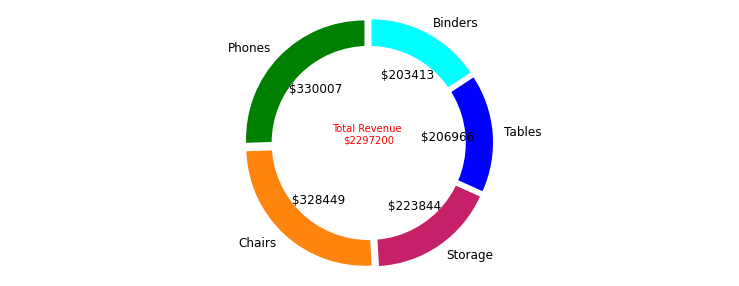

In [119]:
colors = ['green','#FE840E','#C62168','blue','cyan']
explode = (0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_Sub_Category['Sales'], colors = colors, labels=Top_Sub_Category['Sub-Category'], autopct= autopct_format(Top_Sub_Category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_Sub_Category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()


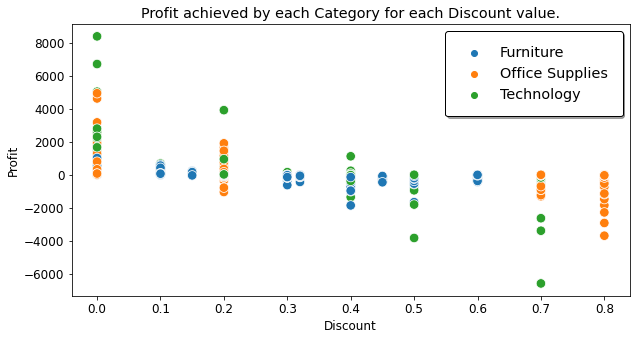

In [123]:
fig,ax = plt.subplots(figsize=(10,5))
sb.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=90)
ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
ax.set_title('Profit achieved by each Category for each Discount value.')
plt.show()

## 3. Geographical level Analysis

### a) State wise sales

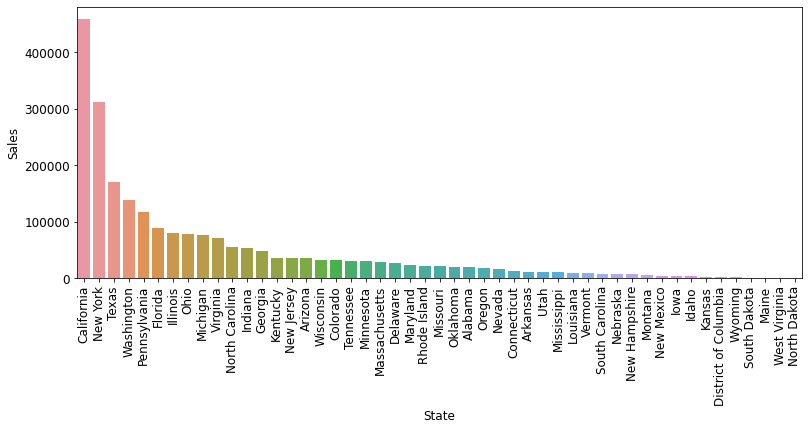

In [125]:
data_state = df.groupby(['State'])[['Sales']].sum().sort_values('Sales', ascending=False)
data_state.reset_index(inplace=True)

plt.xticks(rotation=90),sb.barplot(x='State', y='Sales', data=data_state)
plt.show()

## State Wise Profit

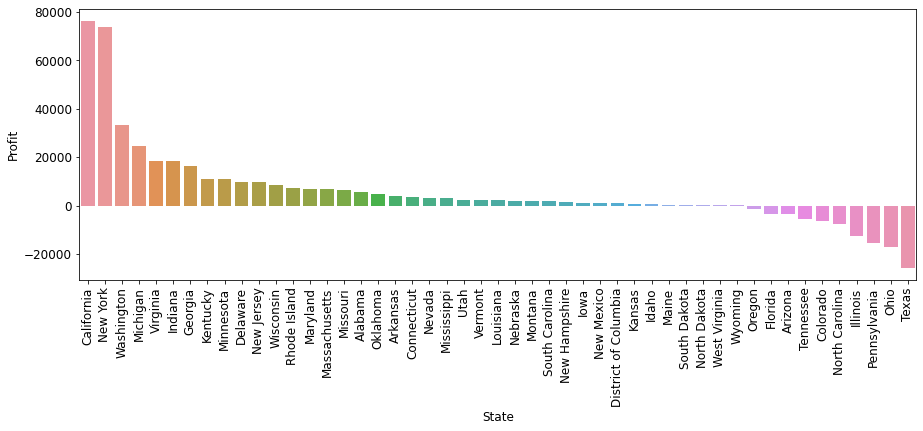

In [128]:
plt.figure(figsize=(15,5))
data_state = df.groupby(['State'])[['Profit']].sum().sort_values('Profit', ascending=False)
data_state.reset_index(inplace=True)

plt.xticks(rotation=90),sb.barplot(x='State', y='Profit', data=data_state)
plt.show()

### State with Losses

In [131]:
state_low_Profit = df.loc[df.Profit < 0]
state_low_Profit = state_low_Profit.sort_values('Profit')

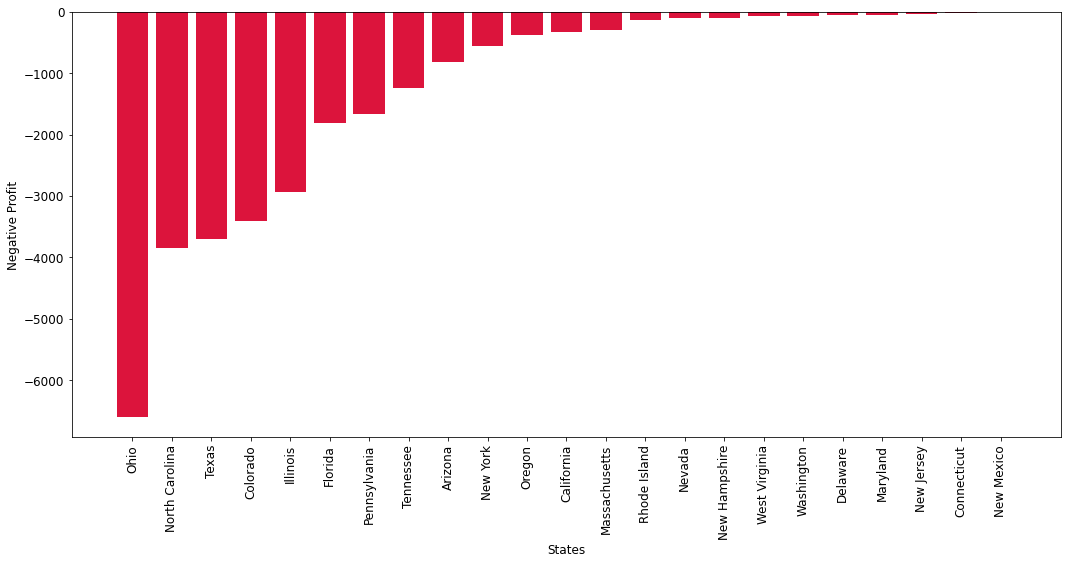

In [134]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(state_low_Profit['State'], state_low_Profit['Profit'], color='crimson')

ax.set_xlabel('States')
ax.set_ylabel('Negative Profit')
plt.xticks(rotation=90)
plt.tight_layout()

### State wise Discount

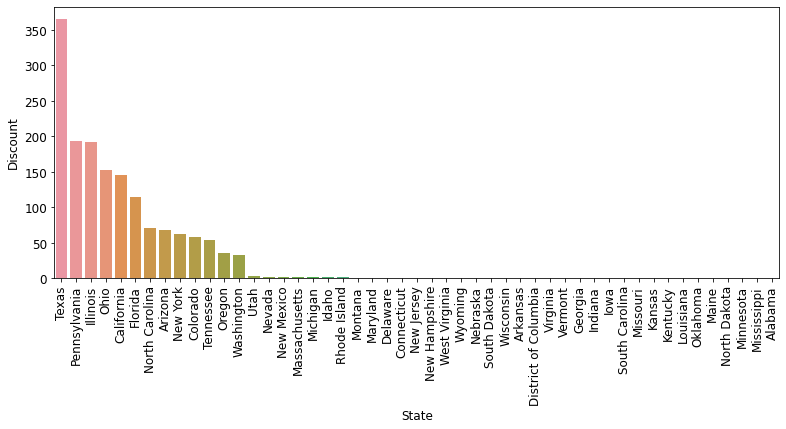

In [137]:
data_state = df.groupby(['State'])[['Discount']].sum().sort_values('Discount', ascending=False)
data_state.reset_index(inplace=True)

plt.xticks(rotation=90),sb.barplot(x='State', y='Discount', data=data_state)
plt.show()

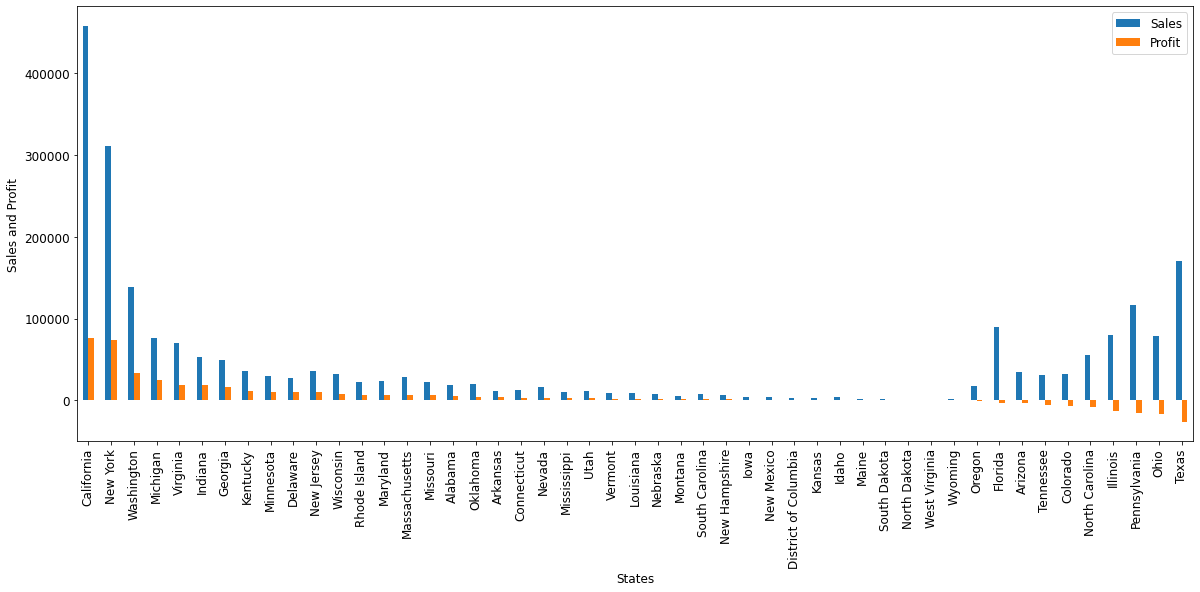

In [140]:
data_state= df.groupby(['State'])[['Sales', 'Profit']].sum()
data_state.sort_values('Profit', ascending=False).plot(kind='bar', figsize=(20,8))

plt.ylabel('Sales and Profit')
plt.xlabel('States')
plt.show()

## Observations
- Machine and Copiers are having less profit and less sale
- The number of Technology Sale is less
- Profit on furnitures is very less
- South region has more sale
- Profit on consumer segment is littel less
- In the West Verginia and Norht Dakota states , sale is very less.
- In California we have large amount of profit.
- In Texas and Ohio we have very less profit

# THANK YOU